Import necessary libraries

In [1]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## Data Cleaning

### **1. Data Imputation**

* Many machine learning algorithms need full feature matrix and they may not work in presence of missing data.
* Data imputation identifies **missing values** in each feature of the dataset and **replaces** them with an **appropriate values** based on a **fixed strategy** such as : 

    * **mean** or **median** or **mode** of that feature.
    
    * **use specified constant** value. Sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose.

In [3]:
from sklearn.impute import SimpleImputer

Some of its important parameters:
  * *missing_values:* could be `int`,`str`,`np.nan` or `None`. Default is `np.nan`.

  * *strategy*: string, default is 'mean'. One the following strategies can be used:

    * `mean`- missing values are  replaced using the **mean** along each column.

    * `median`-missing values are replaced using the **median** along each column.

    * `most_frequent`-missing values are replaced using the **most_frequent** along each column.

    * `constant` - missing values are replaced with value specified in `fill_value` argument.

    * `add_indicator` - a boolean parameter that when set to `True` returns **missing value indicators** in `indicator_` member value.

**NOTE :** 
   * `mean` and `median` strategies can only be used with numeric data. 

   * `most_frequent` and `constant` strategies can be used with strings or numberic data.


#### **Data imputation on real world dataset.**
  Let's perform data imputation on real world dataset. We will be using <https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data> for this purpose. We will load this dataset from csv file.

In [4]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

heart_data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The dataset has the following features : 
* Age (in years)

* Sex (1 = male; 0 = female)

* cp - chest pain type

* trestbps - resting blood pressure (anything above 130-140 is typically cause for concern) 

* fbs - fasting blood sugar (>120 mg/dl) (1 = true; 0 = false)

* restecg - resting electrocardiographic results
    * normal=0
    * 1 = having ST-T wave abnormality;

    * 2 = showing probable or definite left ventricular hypertropy by Estes' criteria

* thalch - maximum heart rate achieved

* exang - excercise induced angina
    * 1 = yes

    * 0 = no

* oldpeak - depression induced by excercise relative to rest

* slope - slope of the peak excercise ST segment
    * 1 = unsloping;

    * 2 = flat value;

    * 3 = downsloping

* ca - number of major vessels (0-3) colored by fluroscopy 

* thal - (3 = normal; 6 =fixed defect; 7 = reversable defect)

* num - diagnosis of heart disease (angiographic disease status)
  * 0 < 50% diameter narrowing;
  
  * 1: . 50% diameter narrowing

#### STEP 1 : Check if dataset has missing values

* This can be checked via dataset description or by check number of `nan` or `np.null` in the dataframe. However such check can be performed only for numerical features.

* For non-numberical features, we can list their unique values and check if there are values like `?`.

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Let's check if there are any missing values in numerical columns-here we have checked it for all columns in the dataframe.


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are two non-numerical features : `ca` and `thal` so list their unique values:

In [7]:
print('Unique values in ca:', heart_data.ca.unique())
print('Unique values in thal:', heart_data.thal.unique())


Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


Both of them contain `?`, which is a missing value. Let's count the number of missing values.

In [8]:
print('Number of missing vlaue in ca:',
      heart_data.loc[heart_data.ca == '?', 'ca'].count())
print('Number of missing vlaue in thal:',
      heart_data.loc[heart_data.thal == '?', 'thal'].count())


Number of missing vlaue in ca: 4
Number of missing vlaue in thal: 2


#### STEP 2 : Replace ? with `NaN`

In [9]:
heart_data.replace('?' ,np.nan ,inplace=True)

#### STEP 3 : Fill the mising values with sklearn missing value imputation utilities.

Here we use `SimpleImputer` with `mean` strategy. We will try two variations : 

a. **add_indicator=False** : Default choice that only imputes missing values.

In [10]:
imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)

print(heart_data.shape)
print(heart_data_imputed.shape)

(303, 14)
(303, 14)


b. **add_indicator=True** : Adds additional column for each column containing missing values.

In our case, this adds two columns one for `ca` and other for `thal`. It indicates if the sample has a missing value.

Now the number of extra column added will be 1 per missing columns that contains the boolean value i.e True/False to indicate that earlier some values were missing. It is just like a pointer for missing value update.

In [11]:
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean', add_indicator=True)

imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)

print(heart_data.shape)
print(heart_data_imputed_with_indicator.shape)

(303, 14)
(303, 16)


### **2.Feature Scaling**
Feature Scaling **transform feature values** such that **all the features are on the same scale**.

When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:

* __Enables Faster Convergence__ in iterative optimization algorithms like gradien descent and its variants.

* The performance of ML algorithms such as SVM, K-NN and K-means etc. that compute euclidean distance among input samples gets impacted if the features are not scaled.

`Tree` based Ml algorithms are not affected by feature-scaling. In other words, feature scaling is not required for `tree` based ML algorithms.

Feature scaling can be performed with the following methods:
* Standardization

* Normalization

* MaxAbsScaler

#### **Feature Scaling on real world dataset.**
Let's demonstrate feature scaling on a real world dataset. For this purpose we will be using https://archive.ics.uci.edu/ml/datasets/Abalone .

We will use different scaling utilities in the sklearn library.

In [12]:
cols = ['sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=cols)

Abalone dataset has the following features : 

* Sex -nominal (M, F, and I (infant)) 

* Length (mm - Longest shell measurement) 

* Diameter (mm - perpendicular to lenght)

* Height (mm - with meat in shell) 

* Whole weight (grams -whole abalone)

* Shucked weight (grams - whole abalone)

* Viscera weight (grams - gut weight (after bleeding))

* Shell weight (grams - after being dried)

* Rings (target - age in years)

#### **STEP 1 : Examine the dataset**

In [13]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### **STEP 1 [Optional] : Convert non-numerical attributes to numerical ones.**

In this dataset, `sex` is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation.

In [14]:
abalone_data.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [15]:
#Assign numerical values to sex.
abalone_data = abalone_data.replace({"sex": {'M': 1, 'F': 2, 'I': 3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


#### **STEP 2 : Separate labels from features.**

In [16]:
y = abalone_data.pop('Rings')

print('The DataFrame object after deleting the column : \n')
abalone_data.info()

The DataFrame object after deleting the column : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


#### **STEP 3 : Examine feature scales**

##### 3A. **Statistical method**

Check the scales of different feature with `describe` method of dataframe.

In [17]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


**Note :**
* There are 4177 examples or rows in this dataset.
* The mean and standard deviation of features are quite different from one another.

##### 3B. **Visualization of feature distributions**

This method includes : 
* Histogram

* Kernel density estimation (KDE) plot

* Boxplot

* Violin plot

1. **Feature Histogram**

We will have separate and combined histogram plots to check if the feature are indeed on different scales.

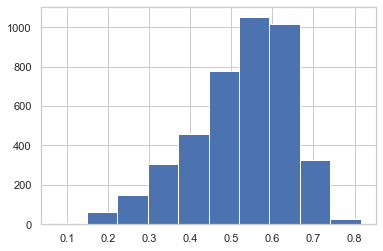

In [18]:
plt.hist(np.array(abalone_data['Length']))
plt.show()

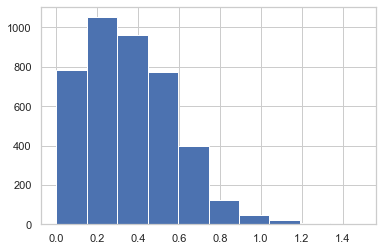

In [19]:
plt.hist(np.array(abalone_data['Shucked weight']))
plt.show()

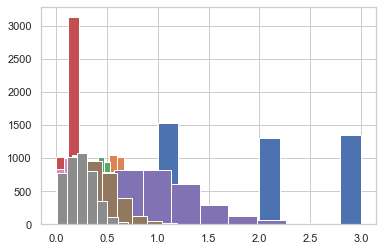

In [20]:
for i in abalone_data.columns:
    plt.hist(np.array(abalone_data[i]))

Observe that the features have different distributions and scales.

2. **KDE plot** 

* Alternatively, we can generate **Kernel Density Estimate** plot using Gaussian Kernels.

* In statistics, kernel density function (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
This function uses Gaussian Kernels and includes automatic bandwidth determination.

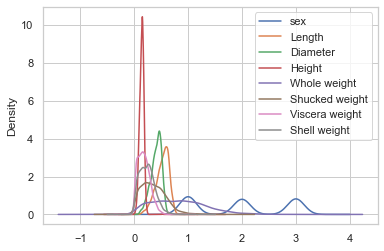

In [21]:
ax = abalone_data.plot.kde()

Observe that the features have different distributions and scales.

3. **Boxplot**

* A **box plot** (or box-and-whisker plot) shows the **distribution of quantitative** in a way that facilitates comparisions between variables or across levels of a categorical variables.

* The box shows the **quartiles** of the dataset while the **whiskers** extend to show the rest of the distribution, except for points that are determined to be 'outliers' using a method that is a function of the inter-quartile range.

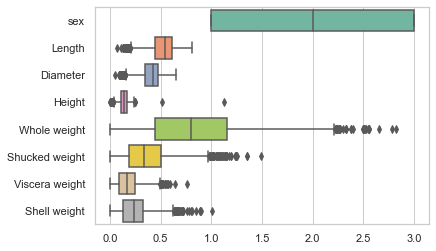

In [22]:
ax = sns.boxplot(data=abalone_data, orient='h', palette='Set2')

#### **STEP 4 : Scaling the features**

##### 4A. **Normalization**

The features are normalized such that their range lies between $[0,1] or [-1,1]$. There are two ways to achieve this : 

* `MaxAbsScaler` transform features in range $[-1,1]$ 
* `MinMaxScaler` transforms features in range $[0,1]$


**a. MaxAbsScaler**

It transforms the original features vector $ \textbf x$ into new feature vector $\textbf x^{'} $ so that all values fall within range [-1,1] and the range of each feature is the same.

\begin{equation} 
\textbf x^{'} = \frac{\textbf x}{\text {MaxAbsoluteValue}}
\end{equation}

where : 

\begin{equation}
 \text {MaxAbsolutevalue}= \text {max}(\textbf x.max,|\textbf x.min|)
 \end{equation}

In [23]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [24]:
from sklearn.preprocessing import MaxAbsScaler 
max_abs_scaler = MaxAbsScaler() 

x_mas = max_abs_scaler.fit_transform(x)
print(x_mas)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


**b. MinMaxScaler**

Normalization is a procedure in which the feature values are scaled such that they range between 0 and 1. This technique is also called **Min-Max Scaling**. 

It is performed with the following formula:
\begin{equation} 
\mathbf X_{new} = \frac{X_{old} - X_{min} }{\mathbf X_{max} - X_{min}}
\end{equation}

where : 
* $X_{old}$ is the old value of a data point, which is rescaled to $ X_{new}$.

* $X_{min}$ is minimum value of feature $X$

* $X_{max}$, is maximum value of feature $X$.

Normalization can be achieved by `MinMaxScaler` from sklearn library.

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_normalized = min_max_scaler.fit_transform(abalone_data)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

Let's look at the mean and standard deviation (SD) of each feature:

In [26]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [27]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

The means of SDs of different features are now comparable. We can confirm this again through visualization as before:

In [28]:
cols = ['sex', 'Length', 'Diameter', 'Height', 'Whole weight',
        'Shucked weight', 'Viscera weight', 'Shell weight']
        
X_normalized = pd.DataFrame(X_normalized, columns=cols)

<AxesSubplot:ylabel='Count'>

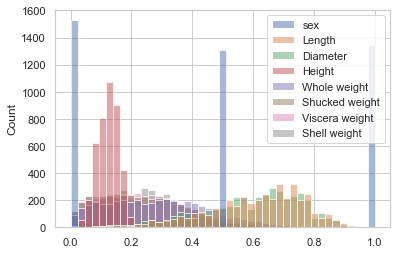

In [29]:
sns.histplot(data=X_normalized)

<AxesSubplot:ylabel='Density'>

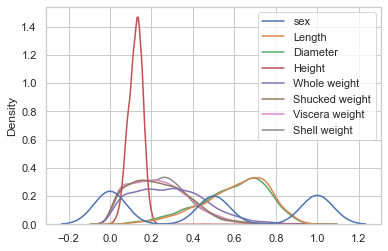

In [30]:
sns.kdeplot(data=X_normalized)

##### 4B. **Standardization**

* Standardization is another feature scaling technique that results into (close to ) zero mean and unit standard deviation of a feature's values.

* Formula for standardization:
\begin{equation} 
X_{new} = \frac{X_{old}-\mu}{\sigma}
\end{equation}

where, $\mu$  and $\sigma$ respectively are the mean and standard deviation of the feature values.

* Standardization can be achieved by `StandardScaler` from sklearn library.

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_standardized = ss.fit_transform(abalone_data)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [32]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [33]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

The means of different features are now comparable with SD = 1

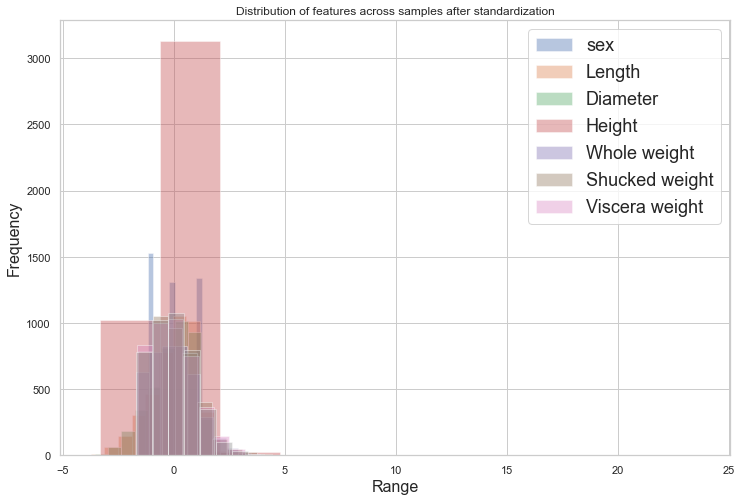

In [34]:
# sns.histplot(data=X_standardized)

in_cols = cols[:len(cols)-1]
plt.figure(figsize=(12, 8))

data = pd.DataFrame(X_standardized, columns=cols)

for colname in abalone_data:
    plt.hist(data[colname].values, alpha=0.4)

plt.legend(in_cols, fontsize=18, loc='upper right', frameon=True)
plt.title('Distribution of features across samples after standardization')
plt.xlabel('Range', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()


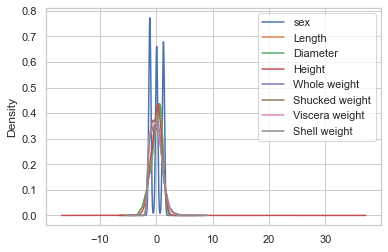

In [35]:
data.plot.kde()
plt.show()

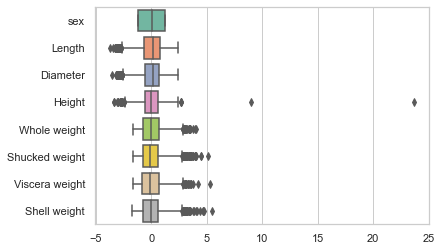

In [36]:
ax = sns.boxplot(data=data, orient='h', palette='Set2')

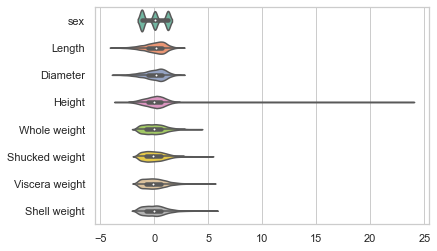

In [37]:
ax = sns.violinplot(data=data, orient='h', palette='Set2')